In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice

from torch import nn
from torch.nn import functional as F

import sys 
import getpass

sys.path.append('../')
from Miniproject_2.model import *
torch.set_grad_enabled(True);

In [2]:
train_in, train_tg = torch.load('../train_data.pkl')
train_in = train_in[:1000].float()/255.
train_tg = train_tg[:1000].float()/255.

val_in, val_tg = torch.load('../val_data.pkl')
val_in = val_in.float()/255.
val_tg = val_tg.float()/255.

bs = 16
ne = 25

In [3]:
def nn_init_weights(model):
    if isinstance(model,nn.Conv2d) or isinstance(model,nn.ConvTranspose2d):
        xavier_normal_(model.weight.data)

In [4]:
def train_nn(model, criterion, train_input, train_target, mini_batch_size, nb_epochs, eta=0.1, optimize=False):
    if optimize: optimizer = torch.optim.SGD(model.parameters(), lr=eta, )
    
    for e in range(nb_epochs):
        for inputs, targets in zip(train_input.split(mini_batch_size), train_target.split(mini_batch_size)):
            output = model(inputs)
            loss = criterion(output, targets)

            model.zero_grad()
            loss.backward()
            
            if optimize:
                optimizer.step()
            else:
                with torch.no_grad():
                    for p in model.parameters(): p -= eta * p.grad
        print("\rCompleted: %d/%d"%(e+1,nb_epochs), end=' ')
    return 

In [5]:
stride = ks = 2

conv1  = nn.Conv2d(in_channels=3, out_channels=32,  kernel_size=ks, stride=stride, bias=False)
conv2  = nn.Conv2d(in_channels=32, out_channels=32,  kernel_size=ks, stride=stride, bias=False)

tconv1 = nn.ConvTranspose2d(in_channels=32, out_channels=32,  kernel_size=ks,\
                            stride=stride, padding=0, dilation=1, bias=False)
tconv2 = nn.ConvTranspose2d(in_channels=32, out_channels=3,  kernel_size=ks,\
                            stride=stride, padding=0, dilation=1, bias=False)

relu      = nn.ReLU()
sigmoid   = nn.Sigmoid()
criterion = nn.MSELoss()


Net = nn.Sequential(conv1, relu, conv2, relu, tconv1, relu, tconv2, sigmoid)
Net.apply(nn_init_weights);

In [6]:
train_nn(Net, criterion, train_in, train_tg, bs, ne, optimize=False)

Completed: 25/25 

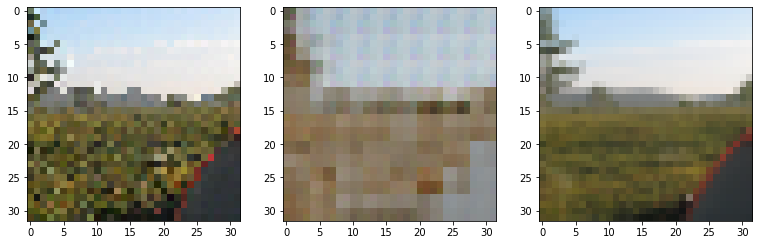

In [7]:
idx = 161
fig, ax = plt.subplots(1,3,figsize=(13,10))

with torch.no_grad():
    ax[0].imshow(val_in[idx].permute(1,2,0))
    ax[1].imshow(Net(val_in)[idx].permute(1,2,0))
    ax[2].imshow(val_tg[idx].permute(1,2,0))

In [3]:
mod = Model()
mod.train(train_in, train_tg, ne)

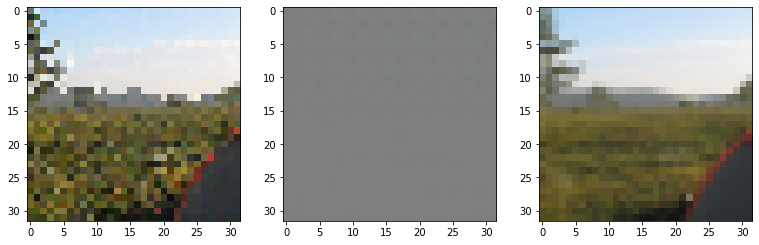

In [4]:
idx = 161
fig, ax = plt.subplots(1,3,figsize=(13,10))

with torch.no_grad():
    ax[0].imshow(val_in[idx].permute(1,2,0))
    ax[1].imshow(mod.predict(val_in)[idx].permute(1,2,0))
    ax[2].imshow(val_tg[idx].permute(1,2,0))